In [108]:
import os
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import ticker
import numpy as np
import re
import matplotlib.dates as dates

In [178]:
df = pd.read_csv('sar_mpgu_izh.csv', header=1, delim_whitespace=True, parse_dates=['09:20:06'], nrows=4875)
df['09:20:06'] = dates.date2num(df['09:20:06'])
df = df.loc[df['CPU'] == 'all']
cpu = df.loc[df['CPU'] == 'all']
cpu['%idle'] = pd.to_numeric(cpu['%idle'])
cpu['%idle'] = 100 - cpu['%idle']
runq = pd.read_csv('sar_mpgu_izh.csv', header=56851, delim_whitespace=True, nrows=195)
x = df['09:20:06']
y = cpu['%idle']
z = runq['runq-sz']

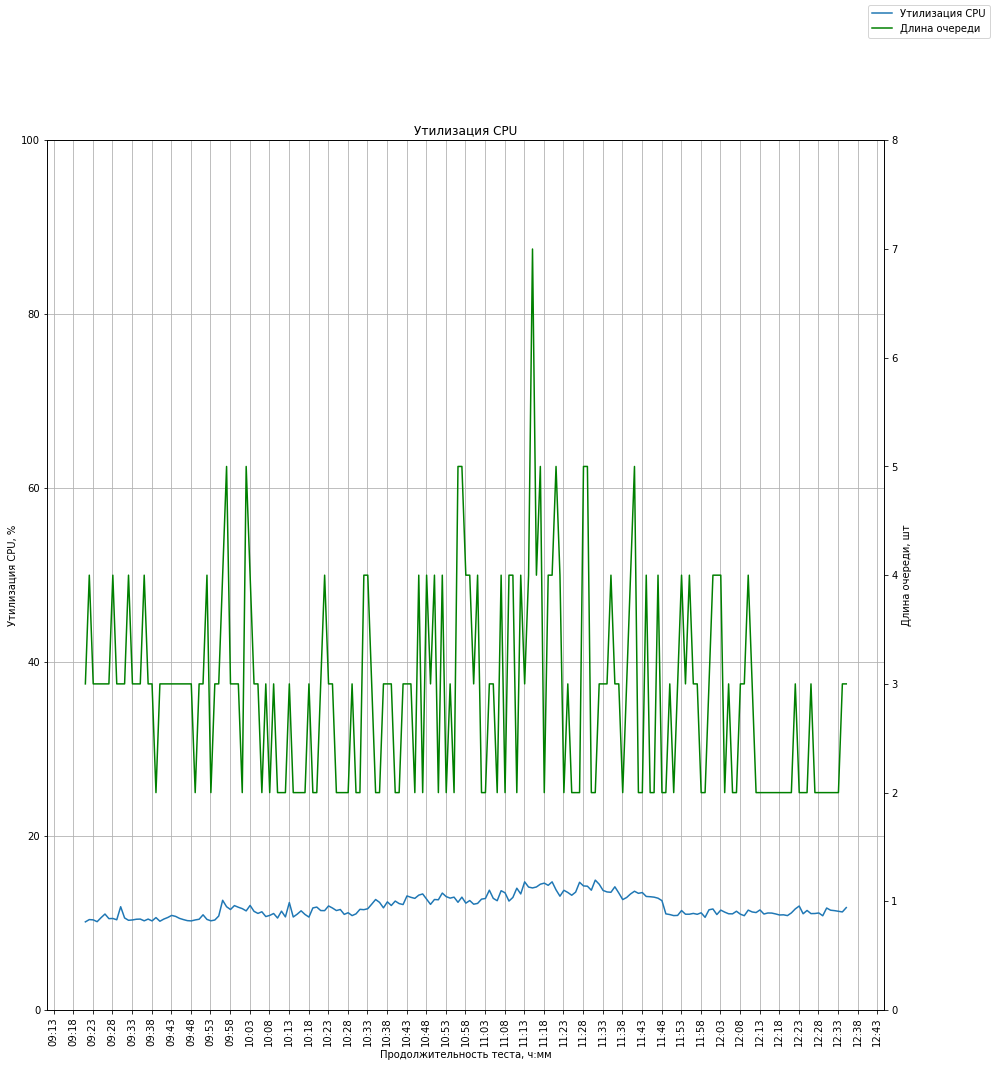

In [179]:
fig = plt.figure(figsize=(15,16))
ax1 = fig.add_subplot(111)
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(dates.MinuteLocator(interval=5))
ax1.grid(True)
plt.xticks(rotation=90)
ax1.set_title('Утилизация CPU')
ax1.set_xlabel('Продолжительность теста, ч:мм')
ax1.set_ylabel('Утилизация CPU, %')
ax1.set_ylim(0,100)
ax1.plot(x,y,label='Утилизация CPU')
ax2=ax1.twinx()
ax2.set_ylabel('Длина очереди, шт')
ax2.set_ylim(0,8)
ax2.plot(x,z,'g',label='Длина очереди')
fig.legend()
plt.show()

In [143]:
memused = pd.read_csv('sar_mpgu_izh.csv', header=56260, usecols=['%memused'], delim_whitespace=True, nrows=195)
y=memused['%memused']

In [145]:
swpused = pd.read_csv('sar_mpgu_izh.csv', header=56457, delim_whitespace=True, usecols=['%swpused'], nrows=195)
z=swpused['%swpused']

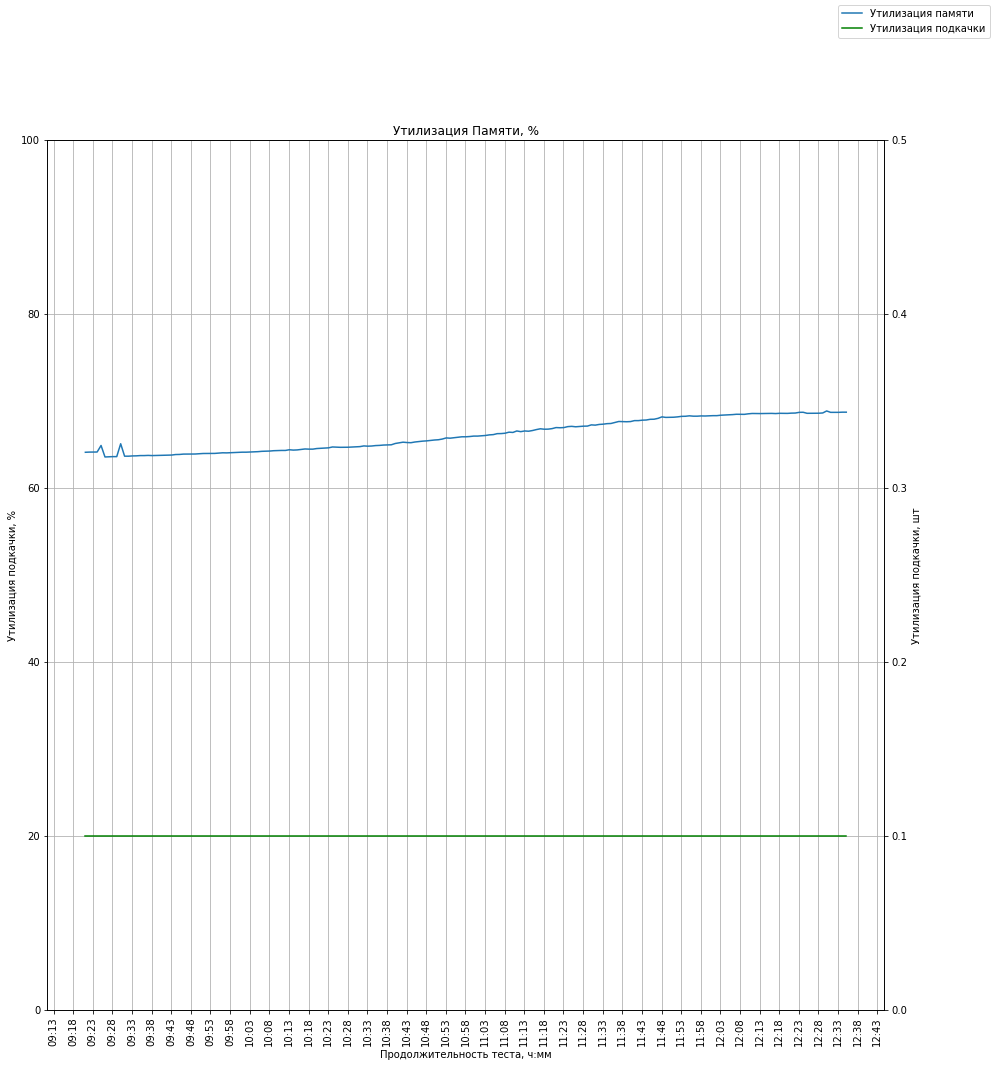

In [149]:
fig = plt.figure(figsize=(15,16))
ax1 = fig.add_subplot(111)
ax1.grid(True)
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(dates.MinuteLocator(interval=5))
ax1.set_title('Утилизация Памяти, %')
ax1.set_xlabel('Продолжительность теста, ч:мм')
ax1.set_ylabel('Утилизация подкачки, %')
ax1.set_ylim(0,100)
ax1.plot(x,y,label='Утилизация памяти')
ax2=plt.twinx()
ax2.set_ylabel('Утилизация подкачки, шт')
ax2.set_ylim(0,0.5)
ax2.plot(x,z,'g',label='Утилизация подкачки')
fig.legend()
plt.show()

In [151]:
ldavg = pd.read_csv('sar_mpgu_izh.csv',header = 56851, delim_whitespace = True, nrows = 195)
y = ldavg['ldavg-1']
z = ldavg['ldavg-5']
w = ldavg['ldavg-15']

     09:20:06  runq-sz  plist-sz  ldavg-1  ldavg-5  ldavg-15
0    09:21:06        3      1444     2.01     2.12      2.15
1    09:22:06        4      1444     2.15     2.14      2.15
2    09:23:06        3      1441     2.24     2.17      2.16
3    09:24:06        3      1442     2.18     2.17      2.16
4    09:25:06        3      1448     2.12     2.15      2.16
..        ...      ...       ...      ...      ...       ...
190  12:31:06        2      1445     2.39     2.32      2.28
191  12:32:06        2      1442     2.35     2.32      2.28
192  12:33:06        2      1442     2.21     2.29      2.27
193  12:34:06        3      1442     2.12     2.25      2.25
194  12:35:06        3      1442     2.14     2.23      2.25

[195 rows x 6 columns]


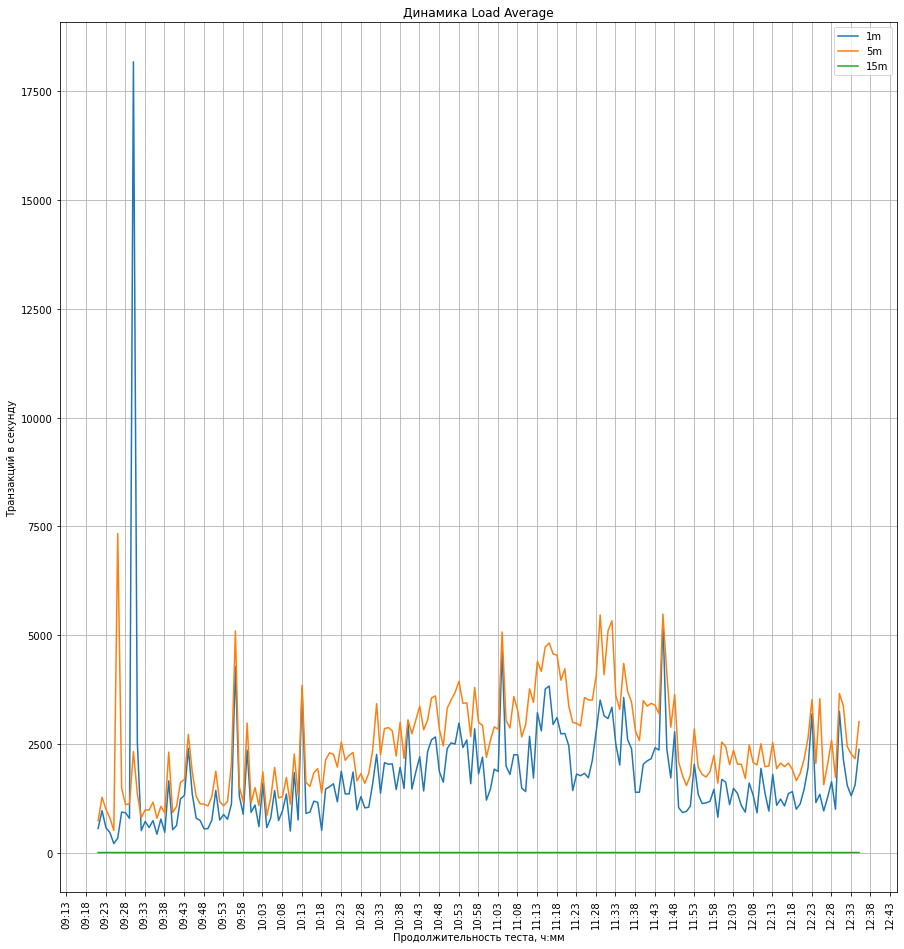

In [167]:
plt.figure(figsize=(15, 16))
plt.grid(True)
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(dates.MinuteLocator(interval=5))
plt.title('Динамика Load Average')
plt.xlabel('Продолжительность теста, ч:мм')
plt.ylabel('Транзакций в секунду')
plt.plot(x, y,label='1m')
plt.plot(x, z,label='5m')
plt.plot(x, w,label='15m')
plt.legend()

In [165]:
temp = pd.read_csv('sar_mpgu_izh.csv', header=61361, delim_whitespace=True, parse_dates=['09:20:06'], nrows=1365)
temp = df.loc[df['IFACE'] == 'eth0']
eth0_df = temp.loc[temp['IFACE'] == 'eth0']
y = eth0_df['rxkB/s']
z = eth0_df['txkB/s']

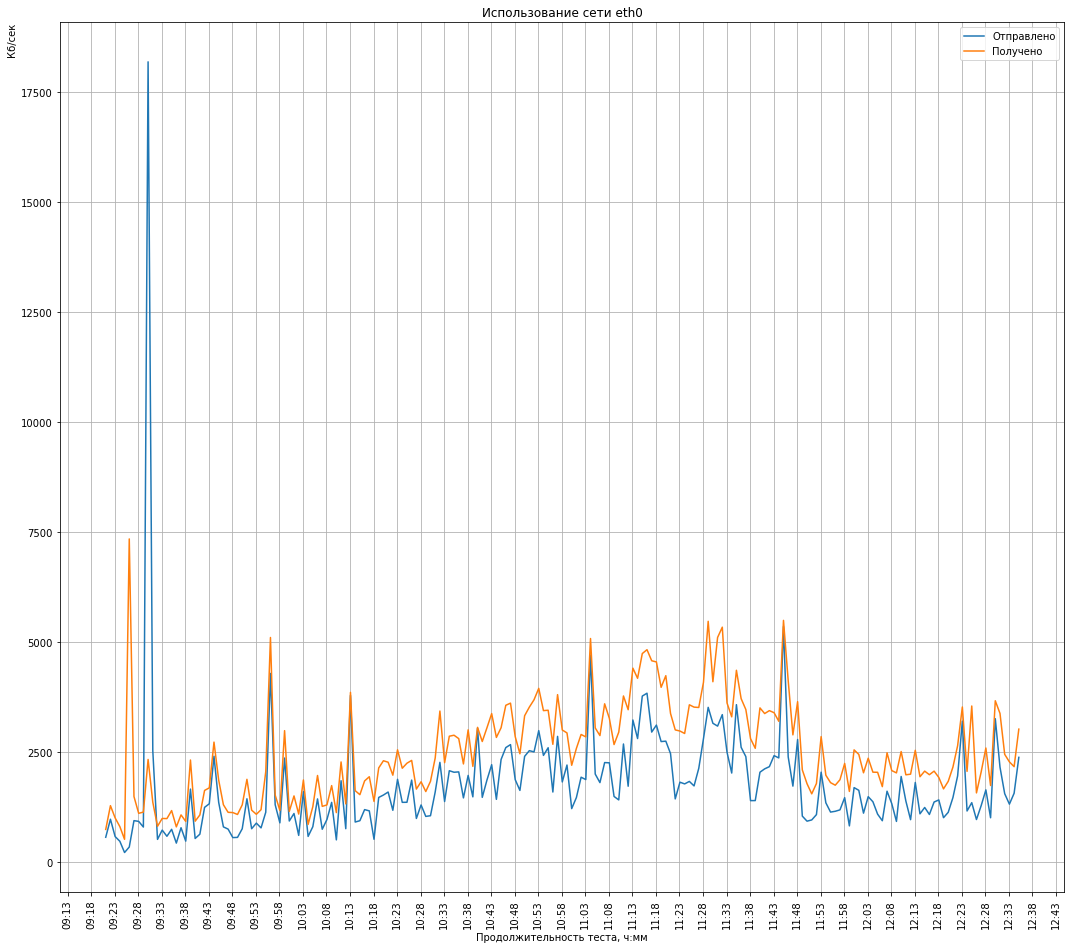

In [166]:
plt.figure(figsize=(15, 16))
plt.grid(True)
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(dates.MinuteLocator(interval=5))
plt.title('Использование сети eth0')
plt.xlabel('Продолжительность теста, ч:мм')
plt.ylabel('Кб/сек', loc='top')
plt.plot(x, y,label='Отправлено')
plt.plot(x, z,label='Получено')
plt.legend()

In [168]:
temp = pd.read_csv('sar_mpgu_izh.csv', header=61361, delim_whitespace=True, parse_dates=['09:20:06'], nrows=1365)
temp = temp.loc[temp['IFACE'] == 'eth0.703']

eth0703_df = temp.loc[temp['IFACE'] == 'eth0.703']

x = eth0703_df['09:20:06']
y = eth0703_df['rxkB/s']
z = eth0703_df['txkB/s']

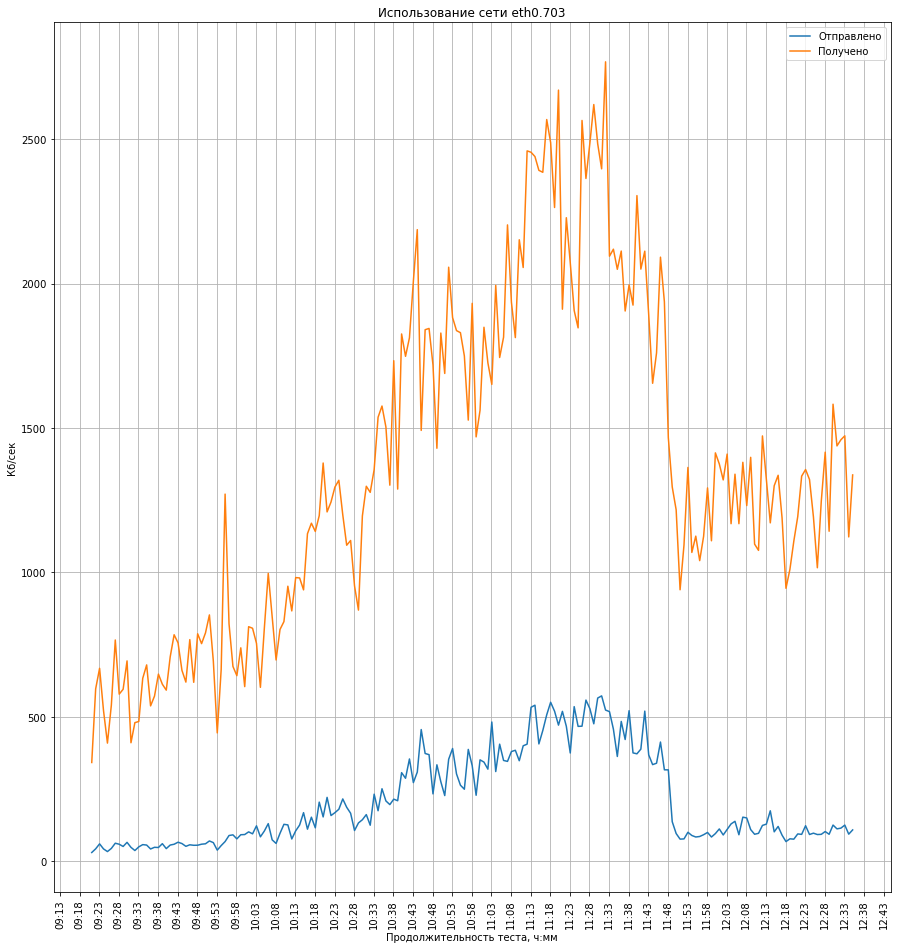

In [169]:
plt.figure(figsize=(15, 16))
plt.grid(True)
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_formatter(dates.DateFormatter('%H:%M'))
plt.gca().xaxis.set_major_locator(dates.MinuteLocator(interval=5))
plt.title('Использование сети eth0.703')
plt.xlabel('Продолжительность теста, ч:мм')
plt.ylabel('Кб/сек')
plt.plot(x, y,label='Отправлено')
plt.plot(x, z,label='Получено')
plt.legend()